In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("canada_emissions.csv")

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.564523,58.567857,16.0,208.0,246.0,288.0,522.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<Axes: >

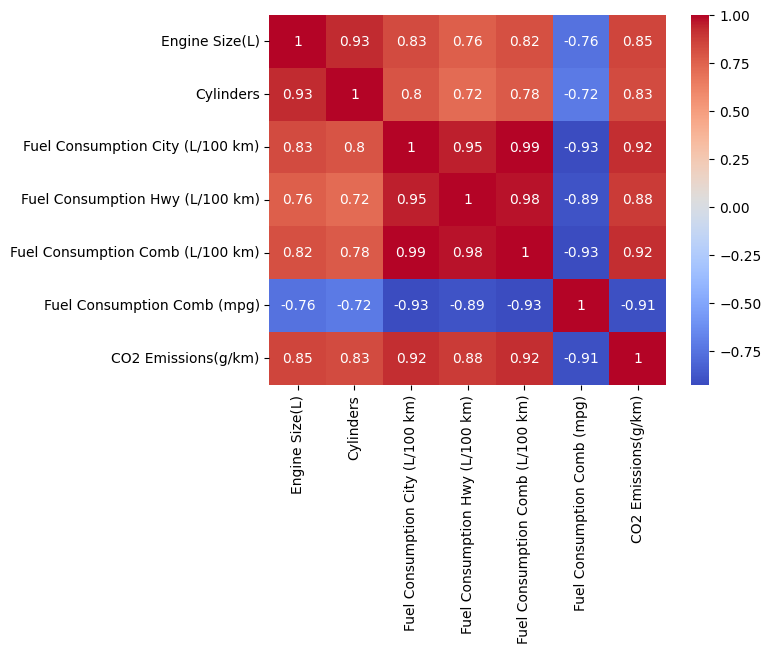

In [6]:
corr_data = df[[
    "Engine Size(L)", 
    "Cylinders", 
    "Fuel Consumption City (L/100 km)", 
    "Fuel Consumption Hwy (L/100 km)", 
    "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)",
    "CO2 Emissions(g/km)"
    ]]

sns.heatmap(data=corr_data.corr(), annot=True, cmap="coolwarm")

In [7]:
sdf = df[["Engine Size(L)", "CO2 Emissions(g/km)"]]

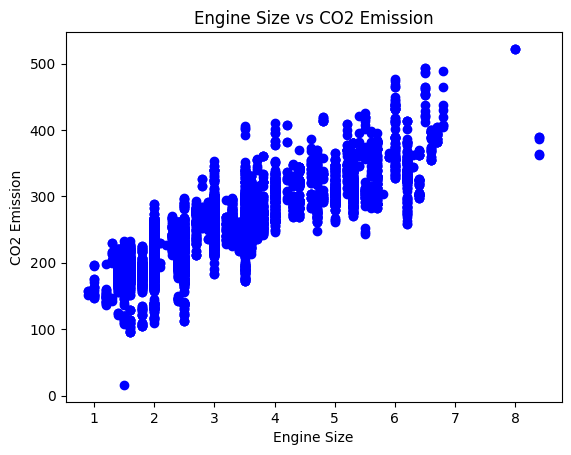

In [8]:
plt.scatter(sdf["Engine Size(L)"], sdf["CO2 Emissions(g/km)"], color="b")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.title("Engine Size vs CO2 Emission")
plt.show()

In [9]:
before = sdf.shape

z = zscore(sdf)
sdf = sdf[(np.abs(z) <= 3).all(axis=1)]

print(f"Removed Data: {before[0] - sdf.shape[0]}")
print(f"Before: {before}")
print(f"After: {sdf.shape}")

Removed Data: 51
Before: (7385, 2)
After: (7334, 2)


In [10]:
x = sdf["Engine Size(L)"]
y = sdf["CO2 Emissions(g/km)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

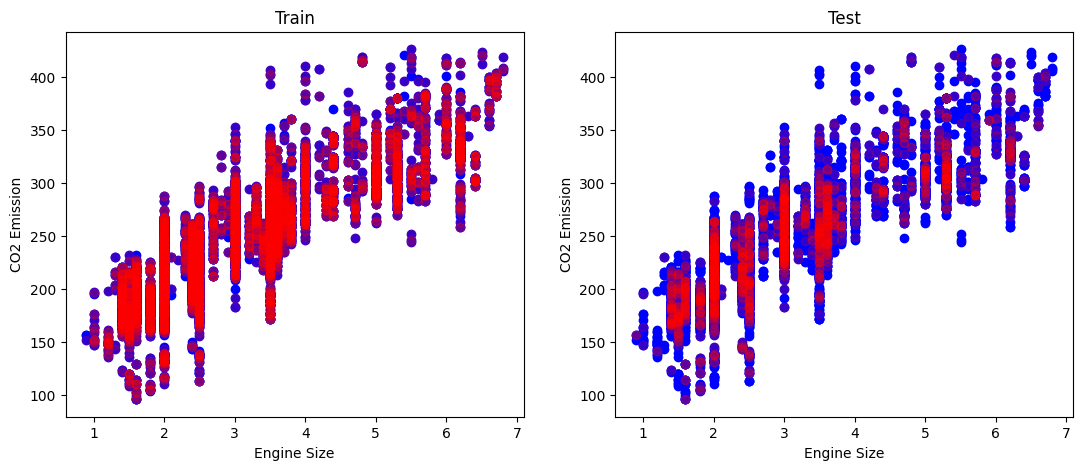

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(sdf["Engine Size(L)"], sdf["CO2 Emissions(g/km)"], color="b")
ax1.scatter(x_train, y_train, color="r", alpha=0.2)
ax1.set_xlabel("Engine Size")
ax1.set_ylabel("CO2 Emission")
ax1.set_title("Train")

ax2.scatter(sdf["Engine Size(L)"], sdf["CO2 Emissions(g/km)"], color="b")
ax2.scatter(x_test, y_test, color="r", alpha=0.2)
ax2.set_xlabel("Engine Size")
ax2.set_ylabel("CO2 Emission")
ax2.set_title("Test")

plt.show()

In [12]:
model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
model.fit(x_train.to_frame(), y_train)

,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [13]:
y_pred = model.predict(x_test.to_frame())

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 22.803537759512682
MSE: 926.4282691503347
R2 Score: 0.7183951355461557


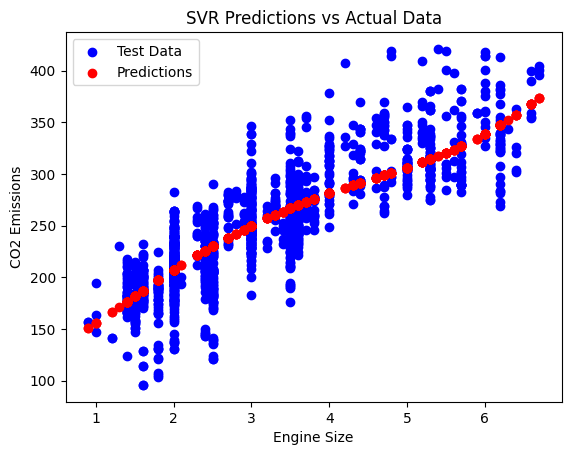

In [ ]:
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.scatter(x_test, y_pred, color='red', label='Predictions')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('SVR Predictions vs Actual Data')
plt.legend()
plt.show()

In [15]:
svr = SVR(kernel='rbf')

param_grid = {
    'C': [1, 10, 50, 100, 200],
    'gamma': [0.01, 0.05, 0.1, 0.2, 0.5],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

In [16]:
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train.to_frame(), y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 200, 'epsilon': 0.5, 'gamma': 0.5}
Best MSE: 842.6444686944438


In [23]:
best_model = SVR(kernel="rbf", C=200, gamma=0.5, epsilon=0.5)
best_model.fit(x_train.to_frame(), y_train)

,kernel,'rbf'
,degree,3
,gamma,0.5
,coef0,0.0
,tol,0.001
,C,200
,epsilon,0.5
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [25]:
best_y_pred = best_model.predict(x_test.to_frame())

print("MAE:", mean_absolute_error(y_test, best_y_pred))
print("MSE:", mean_squared_error(y_test, best_y_pred))
print("R2 Score:", r2_score(y_test, best_y_pred))

MAE: 22.423244649687607
MSE: 897.958145936899
R2 Score: 0.7270491516804614


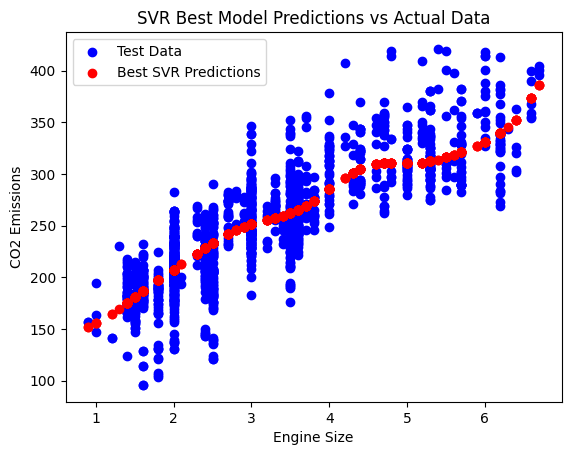

In [26]:
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.scatter(x_test, best_y_pred, color='red', label='Best SVR Predictions')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('SVR Best Model Predictions vs Actual Data')
plt.legend()
plt.show()